# MATH 693A Advanced Numerical Methods: Computational Optimization HW 2

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

# Problem 1

In [3]:
# Rosenbrock function
def objective_func(xbar_k):
    x = xbar_k[0]
    y = xbar_k[1]

    return 100*(y - x**2)**2 + (1 - x)**2

def gradient(xbar_k):
    x = xbar_k[0]
    y = xbar_k[1]

    return np.array([400*x**3 - 400*x*y + 2*x - 2, 200*(y - x**2)])

def hessian(xbar_k):
    x = xbar_k[0]
    y = xbar_k[1]
    
    return np.array([[1200*x**2 - 400*y + 2, -400*x],[-400*x, 200]])

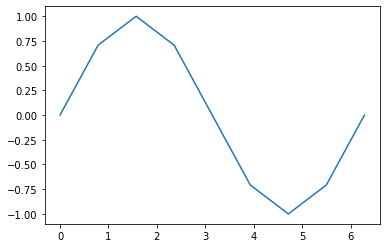

In [17]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8) # start, end, diff
y = np.sin(x)

plt.plot(x,y)

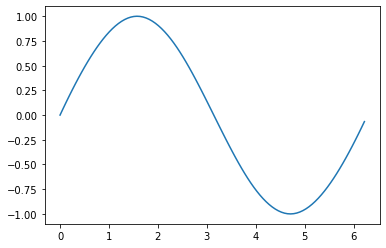

In [25]:
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)
plt.plot(xnew,ynew)

In [ ]:
def phi(obj_func, xbar_trans, alpha, pbar_k):
    return obj_func(xbar_trans + alpha * pbar_k) 

def derphi(grad, xbar_trans, alpha, pbar_k):
    val = grad(xbar_trans + alpha * pbar_k)
    return np.dot(val, pbar_k)

In [ ]:
# try implementing **args
def interp(alpha_low, alpha_high, obj_func, grad, xbar_trans, pbar_k):
    alpha_km1 = alpha_low
    alpha_k = alpha_high
    d1 = derphi(grad, xbar_trans, alpha_km1, pbar_k) + derphi(grad, xbar_trans, alpha_k, pbar_k) - \
        3((phi(obj_func, xbar_trans, alpha_km1, pbar_k) - phi(obj_func, xbar_trans, alpha_k, pbar_k)) / (alpha_km1 - alpha_k))
        
    d2 = ((alpha_k - alpha_km1) / np.abs(alpha_k - alpha_km1)) * np.sqrt(d1**2 - derphi(grad, xbar_trans, alpha_km1, pbar_k) * derphi(grad, xbar_trans, alpha_k, pbar_k))

    alpha_kp1 = alpha_k - (alpha_k - alpha_km1) * ((derphi(grad, xbar_trans, alpha_k, pbar_k) + d2 - d1) / 
                (derphi(grad, xbar_trans, alpha_k, pbar_k) - derphi(grad, xbar_trans, alpha_km1, pbar_k) + 2 * d2))

    return alpha_kp1

In [4]:
# interpolation function
def zoom(alpha_low, alpha_high, obj_func, grad, xbar_trans, pbar_k):
    while True:
        # interpolate using Hermite-based cubic interpolation to find a trial step length alpha_j b/t alpha_low and alpha_high
        alpha_j = interp(alpha_low, alpha_high, obj_func, grad, xbar_trans, pbar_k)

    return 

In [ ]:
# LS/Strong Wolfe Conditions algorithm
def strong_wolfe_conditions(objective_func, xbar_trans, alpha, pbar_k):
    alpha_0 = 0
    alpha_1 = # TODO
    alpha_max = 1
    c1 = 10**-4
    c2 = 0.9 
    e1 = # TODO
    e2 = # TODO

    while True:
        if (phi(objective_func, xbar_trans, alpha_1, pbar_k) > phi(objective_func, xbar_trans, alpha_0, pbar_k)):
            pass

    alpha_0 = alpha_1
    alpha_1 = (alpha_1 + alpha_max) / 2

    return 

# Problem 5 
- epsilons are in safeguards